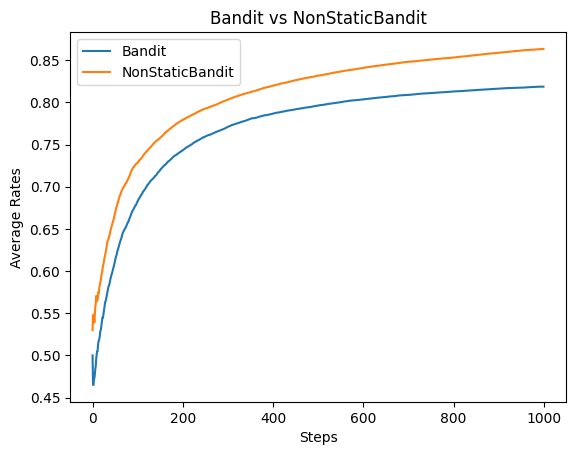

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.artist import allow_rasterization


class Bandit:
    def __init__(self, n_arms=10):
        self.rates = np.random.rand(n_arms)
       # print(self.rates)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0


class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)


class NonStaticBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
       # print(self.rates)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.01 * np.random.randn(self.arms)
        if rate > np.random.rand():
            return 1
        else:
            return 0


class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)


# Parameters
runs = 200  # Number of repeated experiments
steps = 1000  # Number of steps in each experiment
epsilon = 0.1
alpha = 0.8

# Storage for average results
all_bandit_rates = np.zeros((runs, steps))  # Results for Bandit
all_non_static_rates = np.zeros((runs, steps))  # Results for NonStaticBandit

for run in range(runs):
    # Initialize Bandit and NonStaticBandit environments
    bandit = Bandit()
    agent = Agent(epsilon)

    non_static_bandit = NonStaticBandit()
    non_static_agent = AlphaAgent(epsilon, alpha)

    total_bandit_reward = 0
    total_non_static_reward = 0

    bandit_rates = []
    non_static_rates = []

    for step in range(steps):
        # Bandit experiment
        bandit_action = agent.get_action()
        bandit_reward = bandit.play(bandit_action)
        agent.update(bandit_action, bandit_reward)
        total_bandit_reward += bandit_reward
        bandit_rates.append(total_bandit_reward / (step + 1))

        # NonStaticBandit experiment
        non_static_action = non_static_agent.get_action()
        non_static_reward = non_static_bandit.play(non_static_action)
        non_static_agent.update(non_static_action, non_static_reward)
        total_non_static_reward += non_static_reward
        non_static_rates.append(total_non_static_reward / (step + 1))

    # Store rates for this run
    all_bandit_rates[run] = bandit_rates
    all_non_static_rates[run] = non_static_rates

# Compute average rates over all runs
avg_bandit_rates = np.mean(all_bandit_rates, axis=0)
avg_non_static_rates = np.mean(all_non_static_rates, axis=0)

# Plotting
plt.plot(avg_bandit_rates, label="Bandit")
plt.plot(avg_non_static_rates, label="NonStaticBandit")
plt.title("Bandit vs NonStaticBandit")
plt.ylabel("Average Rates")
plt.xlabel("Steps")
plt.legend()
plt.show()
